In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

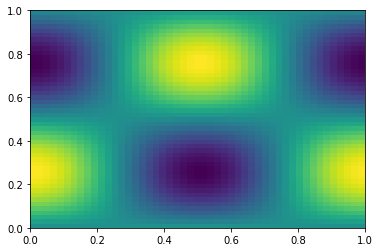

In [2]:
x = np.linspace(0,1)
y = np.linspace(0,1)
x,y = np.meshgrid(x,y)
z = np.cos(x*np.pi*2)*np.sin(y*np.pi*2)
plt.pcolormesh(x,y,z)

In [3]:
from scipy.spatial import Delaunay
pointcloud = np.vstack([x.ravel(),y.ravel(),z.ravel()]).T
tri = Delaunay(pointcloud)
triangles = tri.simplices.copy()

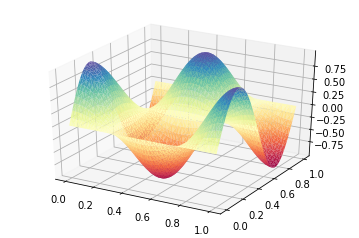

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x.ravel(), y.ravel(), z.ravel(), triangles=triangles, cmap=plt.cm.Spectral)
fig.savefig('asdf.png',dpi=300)
